# Importing all the necessary libraries

In [58]:
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import idx2numpy
import random

# Dataset for this project was taken from MNIST handwritten digit dataset

# Let's convert our datasets into numpy arrays

In [59]:
# specifing the path to IDX3 files
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

# loading the IDX3 files into numpy arrays
train_images = idx2numpy.convert_from_file(train_images_file)
train_labels = idx2numpy.convert_from_file(train_labels_file)
test_images = idx2numpy.convert_from_file(test_images_file)
test_labels = idx2numpy.convert_from_file(test_labels_file)

# separating the dataset into X (images) and y (labels)
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels

In [60]:
print("Train Images Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [61]:
# reshaping our data
X_train = X_train.reshape(60000, 28*28) 
X_test = X_test.reshape(10000, 28*28)

In [62]:
# after reshaping
print("Train Images Shape:", X_train.shape)
print("Test Images Shape:", X_test.shape)

Train Images Shape: (60000, 784)
Test Images Shape: (10000, 784)


In [63]:
# let's print the first element of our data
print(f"First element of the X_train: {X_train[0]}")
print(f"First element of the X_train: {y_train[0]}")

First element of the X_train: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 

In [64]:
# let's create softmax function from scratch

def my_softmax(z):  
    
    N = len(z)
    a = np.zeros(N)
    ez_sum = 0
    for k in range(N):
        ez_sum += np.exp(z[k])
    for j in range(N):
        z_num = np.exp(z[j])
        a[j] = (z_num/ez_sum)
    
    return a

In [65]:
# trying out our fuction
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
a

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [66]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

The shape of X_train is: (60000, 784)
The shape of y_train is: (60000,)


# Let's see some of the training example images with labels

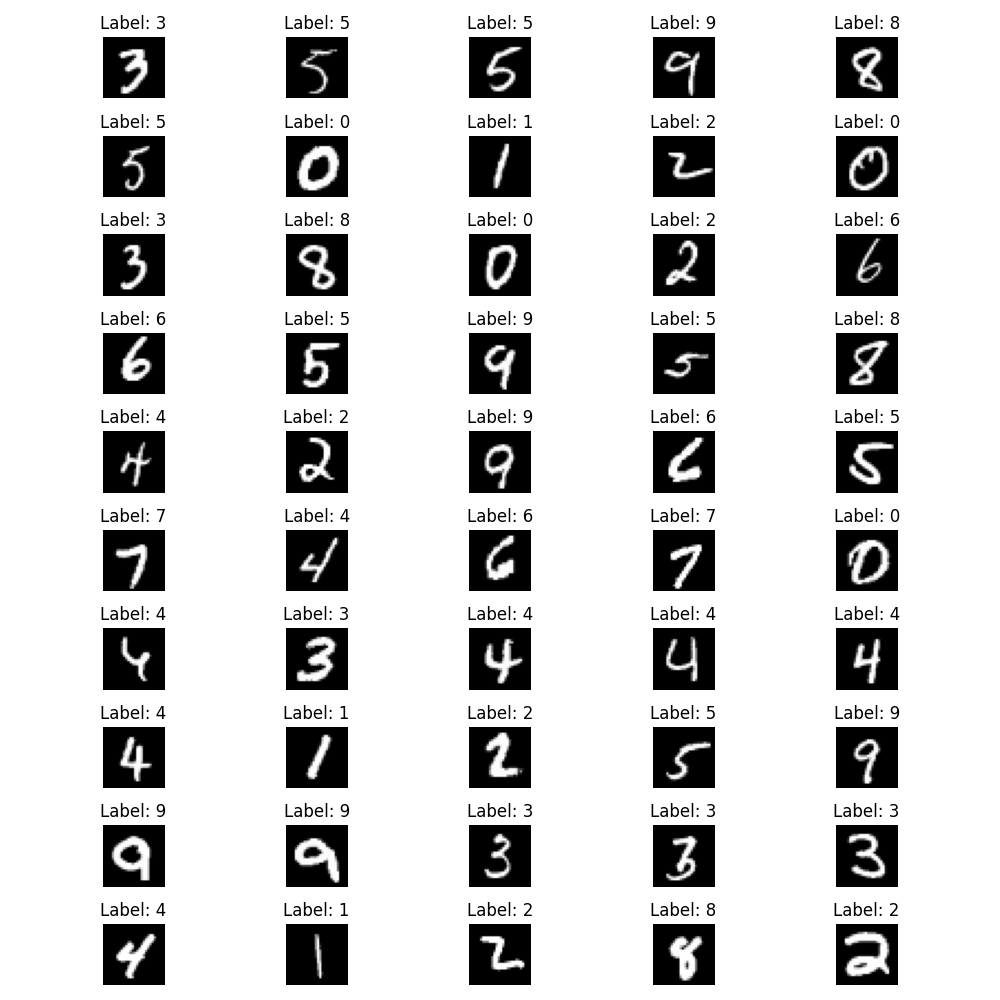

In [67]:
# specifying number of samples
num_samples_to_visualize = 50 

m = X_train.shape[0]

num_rows = 10
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Randomly select indices for visualization
random_indices = np.random.choice(m, num_samples_to_visualize, replace=False)

for i, ax in enumerate(axes.flat):
    random_index = random_indices[i]
    
    flattened_image = X_train[random_index]
    label = y_train[random_index]
    
    # Reshape the flattened image to (28, 28)
    image = flattened_image.reshape((28, 28))
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
    
# Adjust the layout for better visualization
plt.tight_layout()

plt.show()


# Let's build a Neural Network model  

In [68]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units = 25, activation = 'relu', name = "L1"),
        Dense(units = 15, activation = 'relu', name = "L2"),
        Dense (units = 10, activation = 'linear', name = "L3")
    ]        
    , name = "digitrecog_model" 
)

In [69]:
# details of our model
model.summary()

Model: "digitrecog_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# building a function to get all the parameters and their shapes
[layer1, layer2, layer3] = model.layers
def model_param ():
    
    W1,b1 = layer1.get_weights()
    W2,b2 = layer2.get_weights()
    W3,b3 = layer3.get_weights()

    # shapes
    print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
    print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
    print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

    # parameters
    print(f"W1 parameters: \n\n{W1},\n\nb1 parameters: \n\n{b1}\n\n")
    print(f"W2 parameters: \n\n{W2},\n\nb2 parameters: \n\n{b2}\n\n")
    print(f"W3 parameters: \n\n{W3},\n\nb3 parameters: \n\n{b3}")

# Let's train our model

In [72]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
)

training_loss_history = []
num_epochs = 50

for epoch in range(num_epochs):
    history = model.fit(X_train, y_train, epochs=1)
    
    training_loss_history.append(history.history['loss'][0])
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {history.history["loss"][0]:.6f}')


1875/1875 [==============================] - 2s 779us/step - loss: 5.9943
Epoch 1/50, Loss: 5.994265
1875/1875 [==============================] - 2s 850us/step - loss: 2.0159
Epoch 2/50, Loss: 2.015894
1875/1875 [==============================] - 2s 830us/step - loss: 1.6244
Epoch 3/50, Loss: 1.624378
1875/1875 [==============================] - 1s 773us/step - loss: 1.4242
Epoch 4/50, Loss: 1.424160
1875/1875 [==============================] - 1s 762us/step - loss: 1.3227
Epoch 5/50, Loss: 1.322653
1875/1875 [==============================] - 2s 825us/step - loss: 1.2223
Epoch 6/50, Loss: 1.222336
1875/1875 [==============================] - 1s 780us/step - loss: 1.1543
Epoch 7/50, Loss: 1.154333
1875/1875 [==============================] - 1s 781us/step - loss: 1.1079
Epoch 8/50, Loss: 1.107873
1875/1875 [==============================] - 1s 777us/step - loss: 1.0714
Epoch 9/50, Loss: 1.071426
1875/1875 [==============================] - 1s 774us/step - loss: 1.0426
Epoch 10/50, Loss

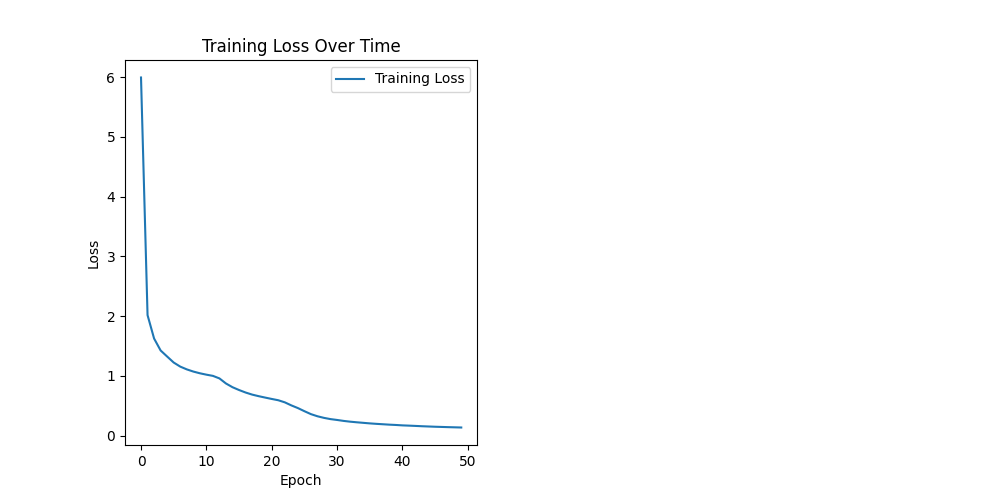

In [73]:
# plot the training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Let's see some of the images with original and predicted labels

1/1 [==============================] - 0s 41ms/step


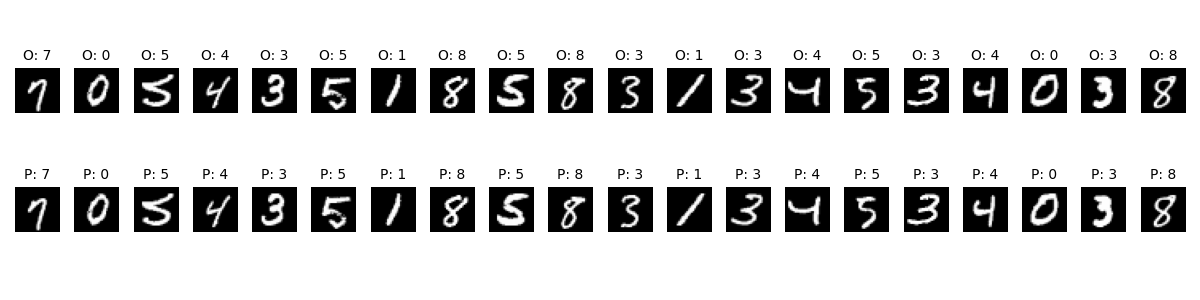

In [74]:
# selecting a random subset of samples from the test dataset
num_samples_to_visualize = 20 
random_indices = random.sample(range(len(X_test)), num_samples_to_visualize)
X_samples = X_test[random_indices]
y_samples = y_test[random_indices]

# predictions on the selected samples
predictions = model.predict(X_samples)

# Convering predictions to class labels using argmax
predicted_labels = np.argmax(predictions, axis=1)

# Visualizing original labels alongside predicted labels
plt.figure(figsize=(12, 3))

for i in range(num_samples_to_visualize):
    plt.subplot(2, num_samples_to_visualize, i + 1)
    plt.imshow(X_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"O: {y_samples[i]}", fontsize=10)
    plt.axis('off')

    plt.subplot(2, num_samples_to_visualize, i + num_samples_to_visualize + 1)
    plt.imshow(X_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"P: {predicted_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Let's evaluate our model's performance

In [75]:
total_predictions = model.predict(X_test)
total_predicted_labels = np.argmax(total_predictions, axis=1)

# accuracy
accuracy = accuracy_score(y_test, total_predicted_labels)

# precision
precision = precision_score(y_test, total_predicted_labels, average='weighted')

# recall
recall = recall_score(y_test, total_predicted_labels, average='weighted')

# F1-score
f1 = f1_score(y_test, total_predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

313/313 [==============================] - 0s 580us/step
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


# let's print all the parameters

In [76]:
model_param()

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)
W1 parameters: 

[[-0.01833555  0.0737229  -0.03037444 ... -0.0394391   0.03224754
   0.03348152]
 [-0.06514778 -0.00781154 -0.08248007 ... -0.01649239  0.00423731
   0.02398565]
 [-0.03685827  0.08376862 -0.03114568 ...  0.00444436  0.08257064
  -0.07335757]
 ...
 [ 0.01839581 -0.00809664 -0.00703587 ... -0.0271461  -0.0366566
   0.04671587]
 [-0.01504943  0.05469461  0.02808022 ... -0.0192723  -0.07179923
   0.04220417]
 [ 0.05865069 -0.05352853  0.04983824 ... -0.05037766  0.04073374
  -0.03064397]],

b1 parameters: 

[ 0.00904432 -0.08056848 -0.05422012 -0.06699514  0.01837631 -0.11510438
 -0.05590024 -0.06357142 -0.11252077 -0.00705613 -0.08307149 -0.08203748
 -0.06133691  0.24622393 -0.05679382 -0.04989376 -0.09477186 -0.0595583
 -0.12411829 -0.01095161 -0.12169643 -0.10986469  0.27226505 -0.05775847
 -0.05124272]


W2 parameters: 

[[ 1.57558769e-01 -3.73499751e-01 